In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Collection and Loss Reverse Forecast\modelling\nasabah\regresi\data_baru\new_data.csv")
df.head()

,Unnamed: 0,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aging,employment_type,loss_reverse
0,0,15500000.0,1.562500e+07,29500000.0,24350000.0,2.0,1.0,670.0,0.0,DPK,Retired,0.000000e+00
1,1,17500000.0,1.770833e+07,3000000.0,1600000.0,31.0,3.0,402.0,1.0,DPK,Full-time,1.770833e+07
2,2,17500000.0,1.483333e+07,13500000.0,9050000.0,0.0,0.0,505.0,0.0,Lancar,Full-time,0.000000e+00
3,3,15500000.0,1.529167e+07,10500000.0,8350000.0,64.0,5.0,508.0,1.0,DPK,Retired,1.529167e+07
4,4,8700000.0,1.404167e+07,6500000.0,5750000.0,14.0,2.0,371.0,0.0,DPK,Contract,0.000000e+00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5000 non-null   int64  
 1   net_income                  5000 non-null   float64
 2   loan_amount                 5000 non-null   float64
 3   avg_amounts_previous_bills  5000 non-null   float64
 4   avg_previous_payment        5000 non-null   float64
 5   amount_of_late              5000 non-null   float64
 6   late_payment_amount         5000 non-null   float64
 7   credit_score                5000 non-null   float64
 8   arrears_amounts             5000 non-null   float64
 9   aging                       5000 non-null   object 
 10  employment_type             5000 non-null   object 
 11  loss_reverse                5000 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 468.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
aging = {"Lancar": 0, "DPK": 1, "Kurang lancar": 2, "Diragukan": 3, "Macet": 4}
employment_type = {"Not-employed": 0, "Self-employed": 1, "Internship": 2, "Part-time": 3, "Contract": 4, "Full-time": 5, "Retired": 6}
columns = {"aging" : aging, "employment_type": employment_type}

for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        df[i] = [columns[i][j] for j in df[i]]
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,net_income,loan_amount,avg_amounts_previous_bills,avg_previous_payment,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse,aging,employment_type
0,0.000000,0.190476,1.24,1.431472,-0.800000,-0.6,1.589041,-1.0,-0.928218,1,6
1,0.266667,0.984127,-0.88,-0.878173,-0.413333,-0.2,0.365297,0.0,0.123762,1,5
2,0.266667,-0.111111,-0.04,-0.121827,-0.826667,-0.8,0.835616,-1.0,-0.928218,0,5
3,0.000000,0.063492,-0.28,-0.192893,0.026667,0.2,0.849315,0.0,-0.019802,1,6
4,-0.906667,-0.412698,-0.60,-0.456853,-0.640000,-0.4,0.223744,-1.0,-0.928218,1,4


In [6]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit(df2)
# Calculate Silhoutte Score
score = silhouette_score(df2, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Average Score: 0.616


In [7]:
y = km.predict(df2)
df2["result"] = y
columns2 = {"aging" : {j:i for i, j in aging.items()},
           "employment_type": {j:i for i, j in employment_type.items()}}

for i in columns2:
    df2[i] = [columns2[i][j] for j in df2[i]]

df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             



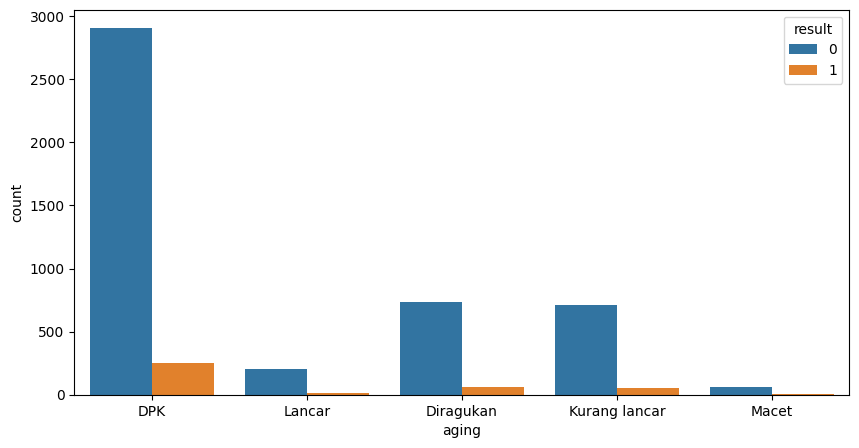

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df2, x="aging", hue="result")
plt.show()

<Axes: xlabel='result', ylabel='net_income'>

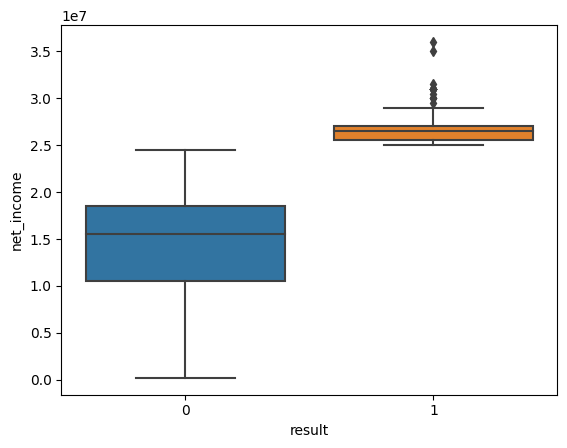

In [9]:
sns.boxplot(data=df2, x="result", y="net_income")

<Axes: xlabel='result', ylabel='loss_reverse'>

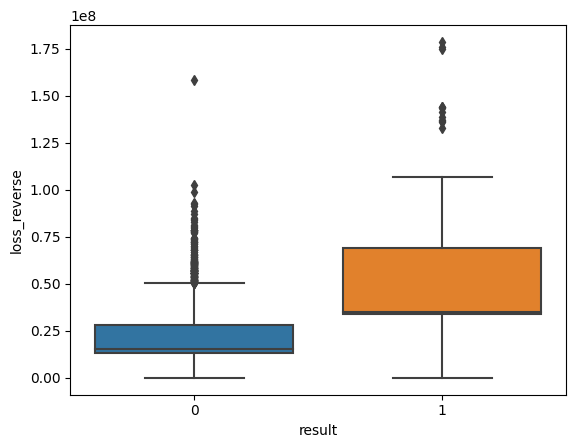

In [10]:
sns.boxplot(data=df2, x="result", y="loss_reverse")

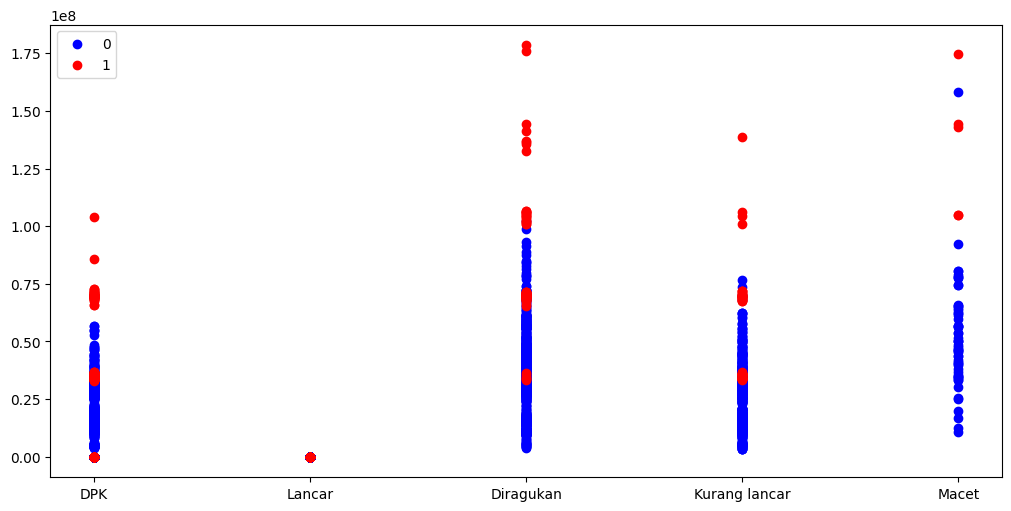

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")

ax.scatter(df2[df2["result"] == 0]["aging"], df2[df2["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df2[df2["result"] == 1]["aging"], df2[df2["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["aging"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["aging"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

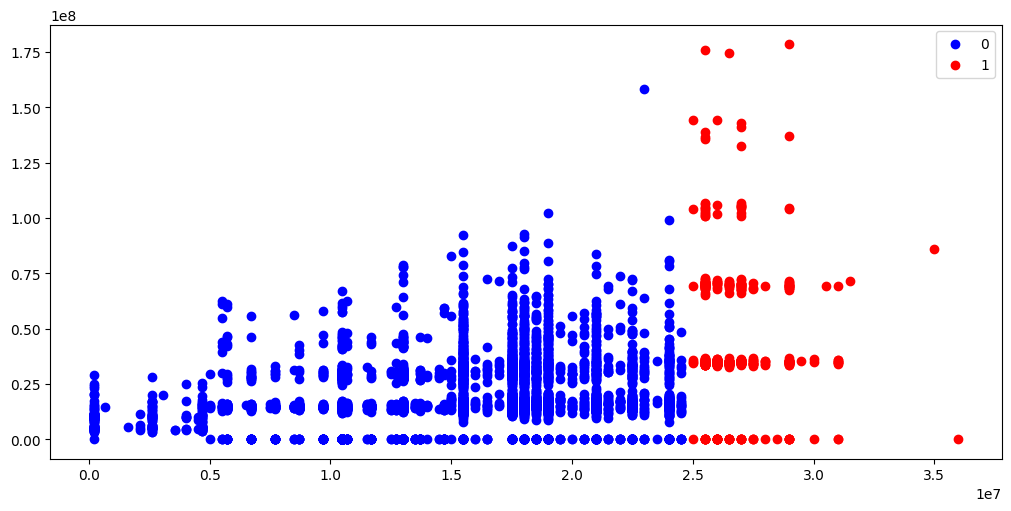

In [12]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.scatter(df2[df2["result"] == 0]["net_income"], df2[df2["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df2[df2["result"] == 1]["net_income"], df2[df2["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["net_income"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["net_income"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

In [13]:
df2["result"].value_counts()

result
0    4610
1     390
Name: count, dtype: int64

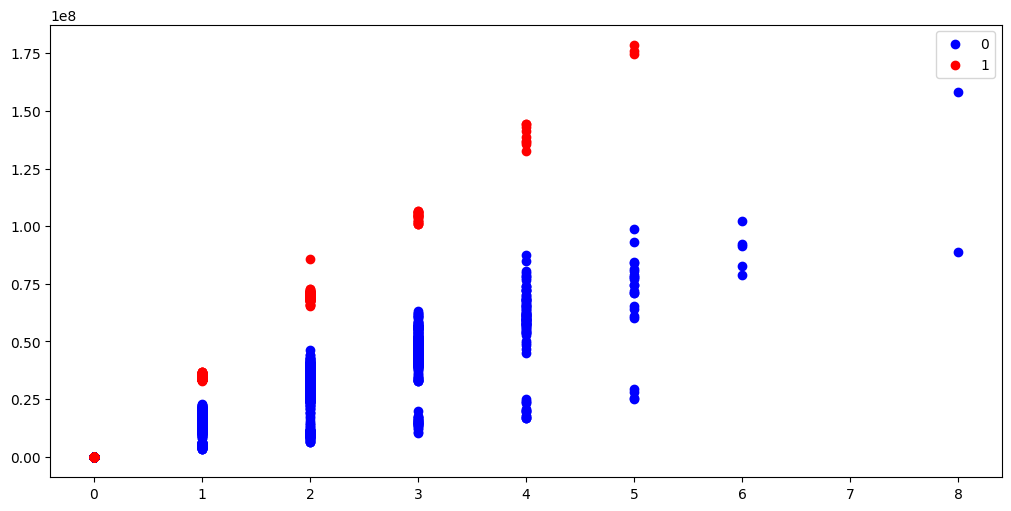

In [14]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.scatter(df2[df2["result"] == 0]["arrears_amounts"], df2[df2["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df2[df2["result"] == 1]["arrears_amounts"], df2[df2["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["arrears_amounts"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["arrears_amounts"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

In [15]:
df_new = pd.read_csv(r"./data/data_for_clustering.csv")
df_new.head()

,Unnamed: 0,net_income,loan_amount,amount_of_late,late_payment_amount,arrears_amounts,aging,loss_reverse
0,0,15500000.0,1.562500e+07,2.0,1.0,0.0,DPK,0.000000e+00
1,1,17500000.0,1.770833e+07,31.0,3.0,1.0,DPK,1.770833e+07
2,2,17500000.0,1.483333e+07,0.0,0.0,0.0,Lancar,0.000000e+00
3,3,15500000.0,1.529167e+07,64.0,5.0,1.0,DPK,1.529167e+07
4,4,8700000.0,1.404167e+07,14.0,2.0,0.0,DPK,0.000000e+00


In [16]:
for i in df_new.columns:
    if df_new[i].dtype == "object":
        df_new[i] = df_new[i].astype("category")

df_new.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
columns_new = {"aging" : aging}

for i in df_new.columns:
    if df_new[i].dtype == "category" or df_new[i].dtype == "object":
        df_new[i] = [columns_new[i][j] for j in df_new[i]]
             
scaler = RobustScaler().fit(df_new[[i for i in df_new.columns if i not in columns_new]])
df3 = pd.DataFrame(scaler.transform(df_new[[i for i in df_new.columns if i not in columns_new]]), columns=df_new[[i for i in df_new.columns if i not in columns_new]].columns)
for i in columns_new:
    df3[i] = df_new[i]
df3.head(5)

,net_income,loan_amount,amount_of_late,late_payment_amount,arrears_amounts,loss_reverse,aging
0,0.000000,0.190476,-0.800000,-0.6,-1.0,-0.928218,1
1,0.266667,0.984127,-0.413333,-0.2,0.0,0.123762,1
2,0.266667,-0.111111,-0.826667,-0.8,-1.0,-0.928218,0
3,0.000000,0.063492,0.026667,0.2,0.0,-0.019802,1
4,-0.906667,-0.412698,-0.640000,-0.4,-1.0,-0.928218,1


In [18]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit(df3)
# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

c:\Users\DHONI HANIF\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Average Score: 0.678


In [19]:
y2 = km.predict(df3)
df3["result"] = y2
columns_2 = {"aging" : {j:i for i, j in aging.items()}}

for i in columns_2:
    df3[i] = [columns_2[i][j] for j in df3[i]]

df3[[i for i in df_new.columns if i not in columns_new]] = scaler.inverse_transform(df3[[i for i in df_new.columns if i not in columns_new]])             




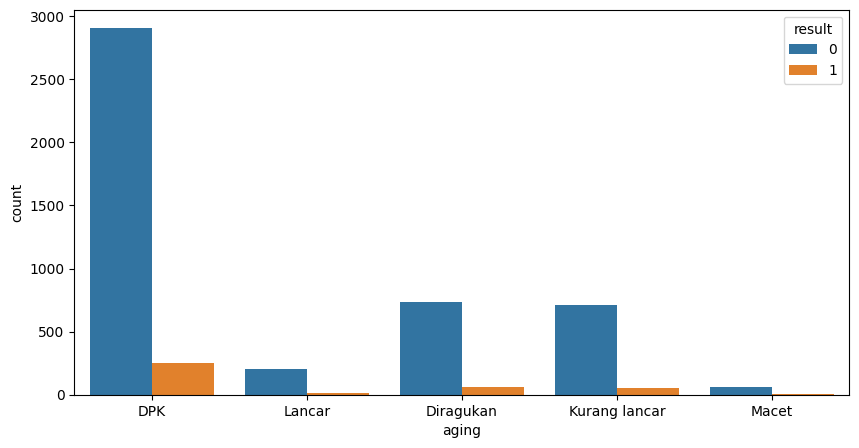

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df3, x="aging", hue="result")
plt.show()

<Axes: xlabel='result', ylabel='loss_reverse'>

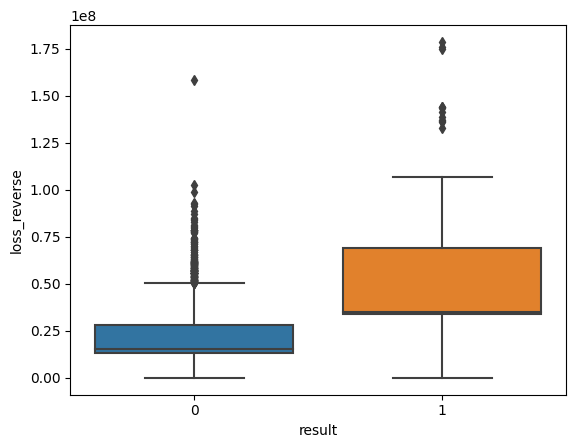

In [21]:
sns.boxplot(data=df3, x="result", y="loss_reverse")

<Axes: xlabel='result', ylabel='net_income'>

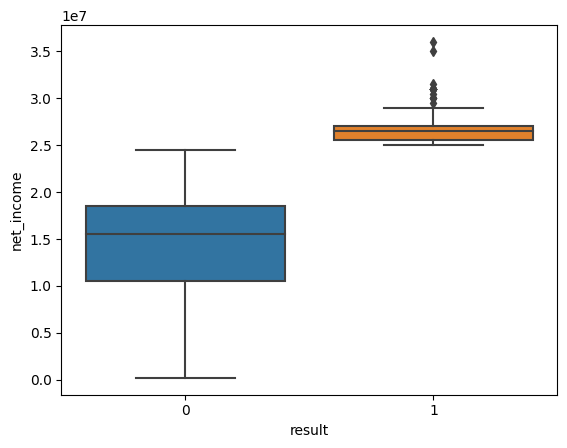

In [22]:
sns.boxplot(data=df3, x="result", y="net_income")

<Axes: xlabel='result', ylabel='loan_amount'>

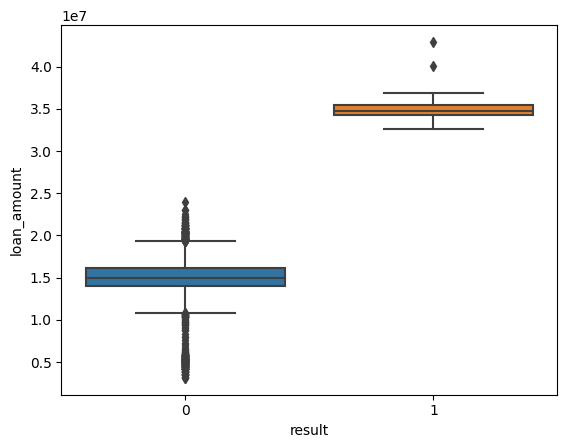

In [23]:
sns.boxplot(data=df3, x="result", y="loan_amount")

<Axes: xlabel='result', ylabel='amount_of_late'>

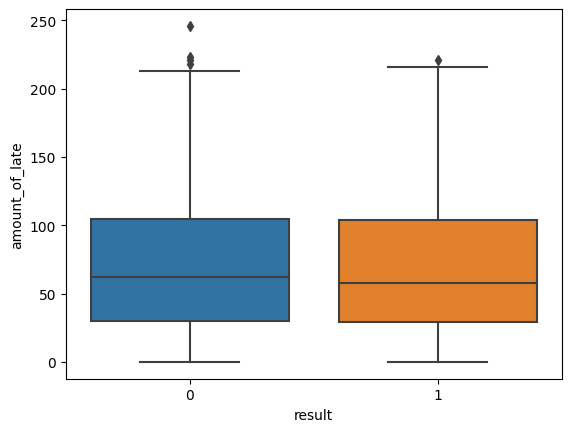

In [24]:
sns.boxplot(data=df3, x="result", y="amount_of_late")

<Axes: xlabel='result', ylabel='late_payment_amount'>

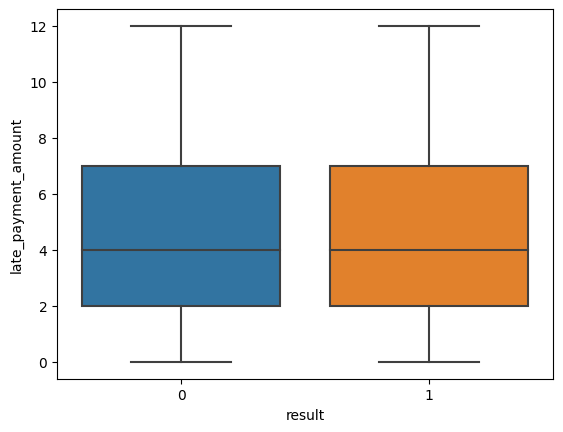

In [25]:
sns.boxplot(data=df3, x="result", y="late_payment_amount")

<Axes: xlabel='result', ylabel='arrears_amounts'>

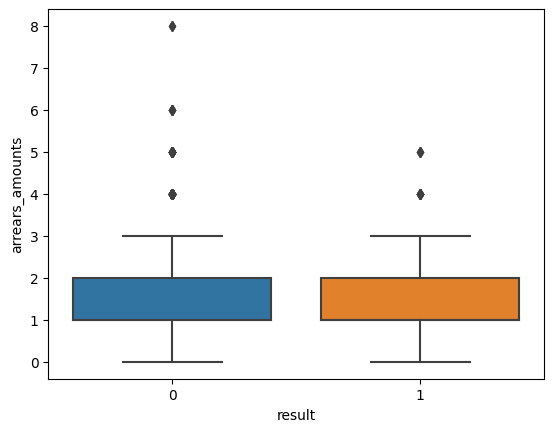

In [26]:
sns.boxplot(data=df3, x="result", y="arrears_amounts")

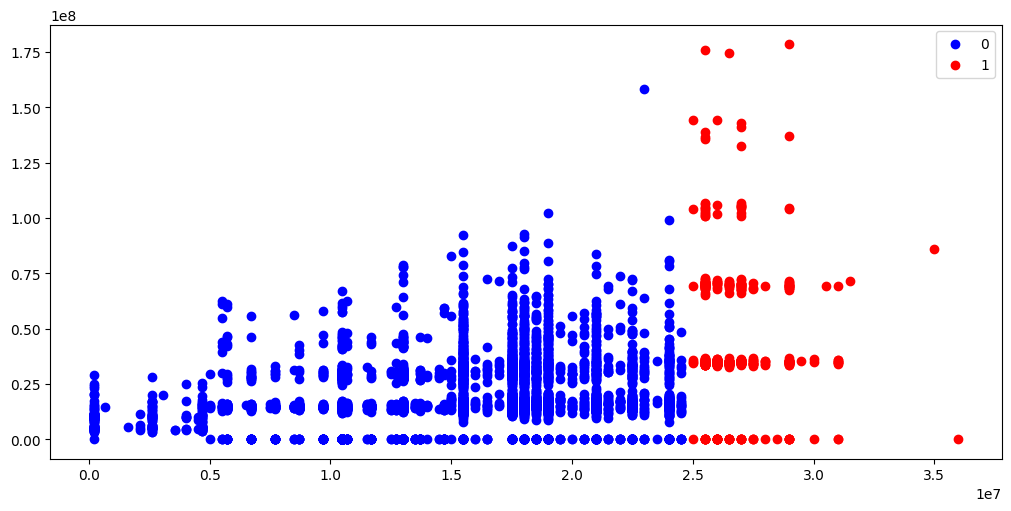

In [27]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.scatter(df3[df3["result"] == 0]["net_income"], df3[df3["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df3[df2["result"] == 1]["net_income"], df3[df3["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["net_income"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["net_income"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()